In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [2]:
df_svm_4q = pd.read_csv('../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../ML_results/SVM/svm_8q.csv')
df_svm_16q_c111 = pd.read_csv('../ML_results/SVM/svm_16q_HSR_c111.csv')
df_svm_16q_cs = pd.read_csv('../ML_results/SVM/svm_16q_HSR_fect.csv')

select all test table runs

In [3]:
df_svm_4q = df_svm_4q[df_svm_4q['machines'] == 1111]
df_svm_8q = df_svm_8q[df_svm_8q['machines'] == 1111]
#df_svm_16q = df_svm_16q[df_svm_16q['machines'] == 1111]

df_svm_4q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_4q,False)
df_svm_8q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_8q,False)

## HSR with all circuits (c111)

In [4]:
df_svm_4q_hsr_c111 = df_svm_4q[df_svm_4q['tr&v circuits'] == 111]
df_svm_8q_hsr_c111 = df_svm_8q[df_svm_8q['tr&v circuits'] == 111]

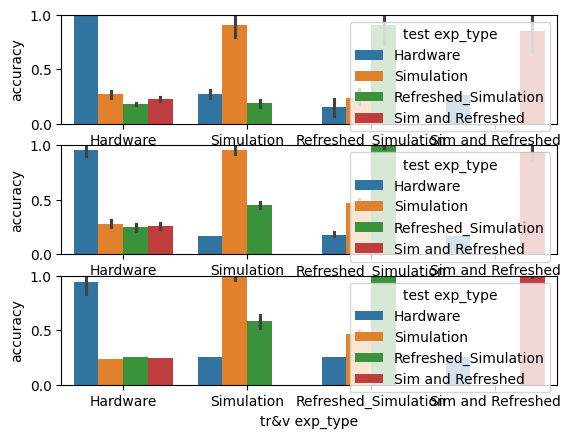

In [5]:
#labels = ["c3","c2","c2,3","c1"]
plt.subplot(311)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_hsr_c111, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
# ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.subplot(312)
ax_bva_8qs=sns.barplot(
    df_svm_8q_hsr_c111, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
# ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.subplot(313)
ax_bva_8qs=sns.barplot(
    df_svm_16q_c111, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
# ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.show()

### Observations

When training and testing on different exp_types, accuracy is always below 50%.
-> Therefore noise profile is not comparable across different exp_types.
One thing to note is training on refreshed and testing on sim ~50% for 8 and 16 qubits.
Also, training on sim and testing on refreshed increases in accuracy as nr qubits increases.

Hardware accuracy is decreases with more qubits, others increase with more qubits

## HSR with c1

In [6]:
df_svm_4q_hsr_c1 = df_svm_4q[df_svm_4q['tr&v circuits'] == 100]
df_svm_8q_hsr_c1 = df_svm_8q[df_svm_8q['tr&v circuits'] == 100]
df_svm_16q_c1 = df_svm_16q_cs[df_svm_16q_cs['tr&v circuits']==100]

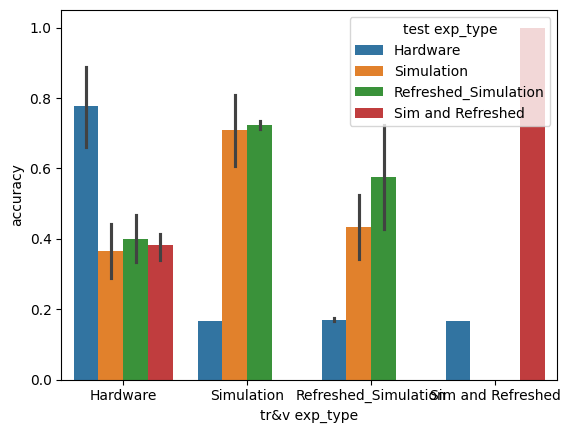

In [7]:
ax_bva_8qs=sns.barplot(
    df_svm_8q_hsr_c1, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
# ax_bva_8qs.set_ylim(tuple([0,1]))

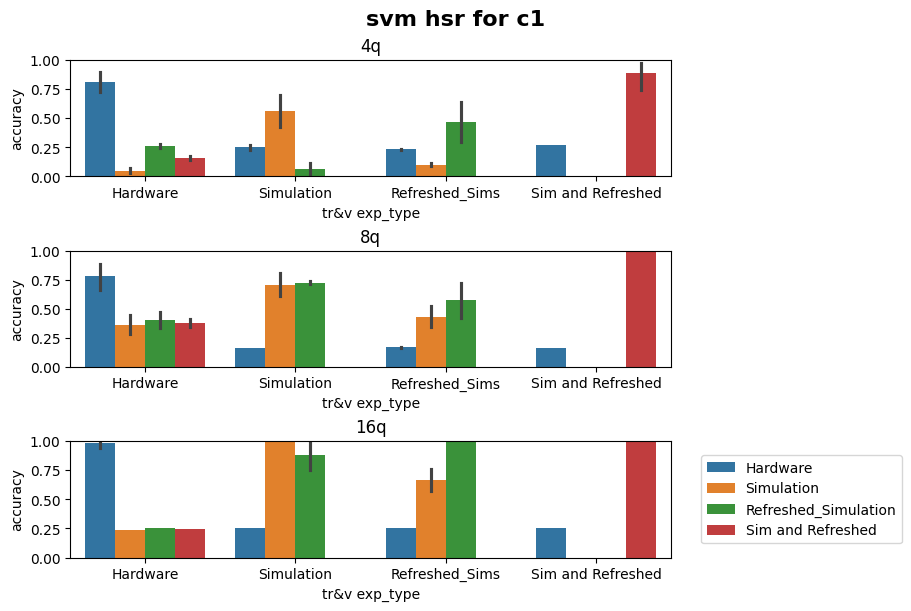

In [10]:
mvf.plot_bar_per_qubit_nr(
    df_svm_4q_hsr_c1,df_svm_8q_hsr_c1,df_svm_16q_c1,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm hsr for c1', nr_cat =4
)

### Observations
all accuracies increase with more qubits. Also refreshed and sim have high cross-exp_type accuracy (hihest with 16q). Could show that c1 fingerprint is not so time-dependent...
*Need to check with new hardware runs


## HSR with c2

In [11]:
df_svm_4q_hsr_c2 = df_svm_4q[df_svm_4q['tr&v circuits'] == 10]
df_svm_8q_hsr_c2 = df_svm_8q[df_svm_8q['tr&v circuits'] == 10]
df_svm_16q_c2 = df_svm_16q_cs[df_svm_16q_cs['tr&v circuits']==10]

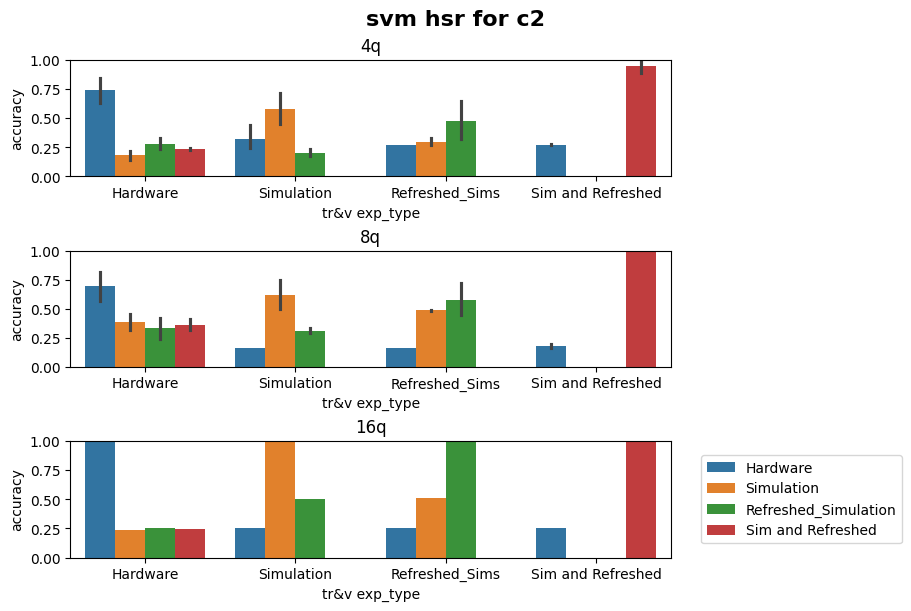

In [12]:
mvf.plot_bar_per_qubit_nr(
    df_svm_4q_hsr_c2,df_svm_8q_hsr_c2,df_svm_16q_c2,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm hsr for c2', nr_cat =4
)

### Observations
self-accuracy increases with more qubits. cross-test with sim and refreshed also increases with more qubits, but is not as high as c1. Why? idk - might have to do with noise introduced by X gates being more time-dependent type of noise?

## HSR with c3

In [14]:
df_svm_4q_hsr_c3 = df_svm_4q[df_svm_4q['tr&v circuits'] == 1]
df_svm_8q_hsr_c3 = df_svm_8q[df_svm_8q['tr&v circuits'] == 1]
df_svm_16q_c3 = df_svm_16q_cs[df_svm_16q_cs['tr&v circuits']==1]

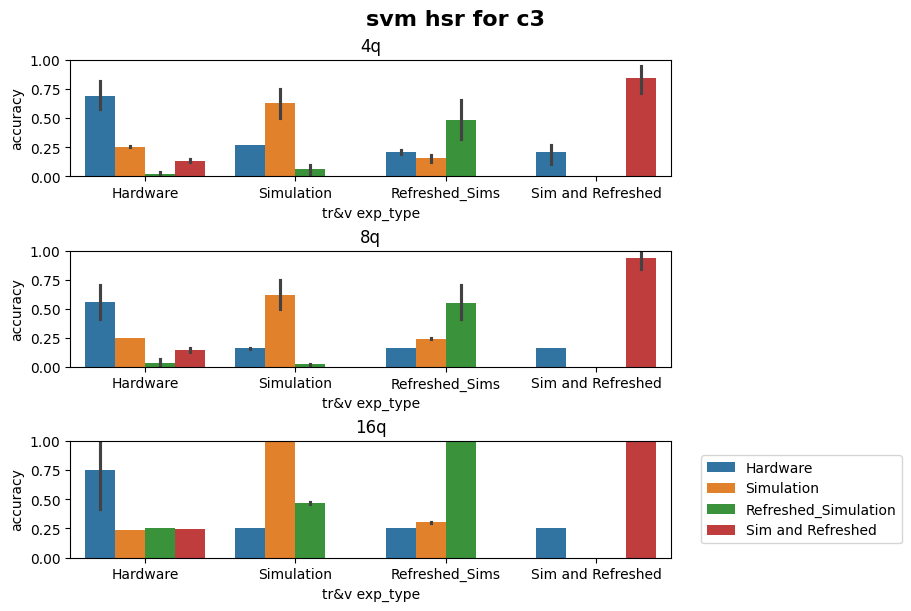

In [15]:
mvf.plot_bar_per_qubit_nr(
    df_svm_4q_hsr_c3,df_svm_8q_hsr_c3,df_svm_16q_c3,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    hue_ = 'test exp_type', title_='svm hsr for c3', nr_cat =4
)

## Observations

Accuracy is generally lower, esp with hardware. Sim and refreshed improve to 100% with 16q but hardware is still ~80%. - this noise might not be closely enough related to the hardware itself. Might be more random?

All cross-exp type accuracies are ~<50%. This one might be good if you want to prevent spoofing